In [48]:
# code to calculate SST index changes for future projections

import jCMIP as jc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import glob
from numpy import loadtxt
import xarray as xr
import scipy
import figure_setups as fs

dirpath = '/home/users/keturner/HACKATHON/project04/data/processed_data/'
ssp = '126'

dset_globavg = xr.load_dataset(dirpath+'cmip6_ssp'+ssp+'_annual_mean_tos.nc')
dset_amv1 = xr.load_dataset(dirpath+'cmip6_ssp'+ssp+'_annual_mean_amv1_tos.nc')
dset_amv2 = xr.load_dataset(dirpath+'cmip6_ssp'+ssp+'_annual_mean_amv2_tos.nc')
dset_sd1 = xr.load_dataset(dirpath+'cmip6_ssp'+ssp+'_annual_mean_sd1_tos.nc')
dset_sd2 = xr.load_dataset(dirpath+'cmip6_ssp'+ssp+'_annual_mean_sd2_tos.nc')
dset_spg = xr.load_dataset(dirpath+'cmip6_ssp'+ssp+'_annual_mean_spg_tos.nc')

figpath = '/home/users/keturner/HACKATHON/project04/results/amoc_sst_figures/'

In [4]:
dset_amv1

<xarray.Dataset>
Dimensions:                 (year: 86)
Coordinates:
  * year                    (year) int64 2015 2016 2017 2018 ... 2098 2099 2100
Data variables:
    ACCESS-CM2_r1i1p1f1     (year) float32 21.25 21.34 21.4 ... 22.34 22.73
    CMCC-CM2-SR5_r1i1p1f1   (year) float32 20.68 20.95 20.97 ... 22.6 22.51
    CanESM5_r1i1p1f1        (year) float32 20.93 20.62 21.14 ... 21.92 22.09
    EC-Earth3_r1i1p1f1      (year) float32 21.0 21.37 21.24 ... 21.39 21.9 21.86
    IPSL-CM6A-LR_r1i1p1f1   (year) float32 20.39 20.13 20.24 ... 20.9 20.88
    MIROC6_r1i1p1f1         (year) float32 20.49 20.2 20.3 ... 20.83 21.41 20.83
    MPI-ESM1-2-HR_r1i1p1f1  (year) float32 20.57 20.58 20.52 ... 20.59 20.78
    MPI-ESM1-2-LR_r1i1p1f1  (year) float32 20.19 20.08 19.93 ... 20.27 20.4

In [5]:
dset_globavg

<xarray.Dataset>
Dimensions:                    (year: 86)
Coordinates:
  * year                       (year) int64 2015 2016 2017 ... 2098 2099 2100
Data variables: (12/21)
    ACCESS-CM2_r1i1p1f1        (year) float32 18.71 18.74 18.71 ... 19.72 19.8
    ACCESS-ESM1-5_r1i1p1f1     (year) float32 19.31 19.18 19.24 ... 19.97 19.99
    BCC-CSM2-MR_r1i1p1f1       (year) float32 19.04 19.13 19.15 ... 19.51 19.52
    CAMS-CSM1-0_r1i1p1f1       (year) float32 18.54 18.53 18.71 ... 18.8 nan
    CESM2-WACCM_r1i1p1f1       (year) float32 19.01 19.07 19.09 ... 20.01 19.99
    CIESM_r1i1p1f1             (year) float32 19.14 19.16 19.27 ... 19.9 19.88
    ...                         ...
    IPSL-CM5A2-INCA_r1i1p1f1   (year) float32 18.3 18.34 18.4 ... 20.98 21.01
    IPSL-CM6A-LR_r1i1p1f1      (year) float32 18.3 18.44 18.54 ... 19.22 19.12
    MIROC6_r1i1p1f1            (year) float32 18.44 18.48 18.53 ... 19.27 18.95
    MPI-ESM1-2-HR_r1i1p1f1     (year) float32 18.2 18.27 18.29 ... 18.56 18.59
    MPI-ESM1-2-LR_r1i1p1f1     (year) float32 17.92 17.88 17.91 ... 18.24 18.3
    MRI-ESM2-0_r1i1p1f1        (year) float32 18.36 18.43 18.34 ... 18.95 18.87

Text(0.5, 1.0, 'AMV1 regional average SSTs, SSP126')

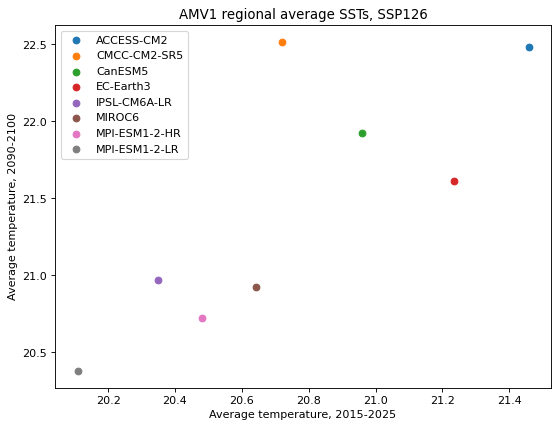

In [29]:
plt.figure(figsize=(8, 6), dpi=80)
for var_name, values in dset_amv1.items():
    plt.scatter(np.nanmean(values[:10]), np.nanmean(values[-10:]), label=var_name[:-9])
plt.legend()
plt.xlabel('Average temperature, 2015-2025')
plt.ylabel('Average temperature, 2090-2100')
plt.title('AMV1 regional average SSTs, SSP' + ssp)

Text(0.5, 1.0, 'Global average SSTs, SSP126')

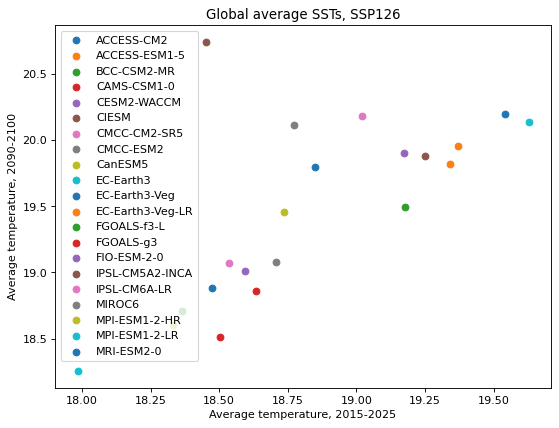

In [30]:
plt.figure(figsize=(8, 6), dpi=80)
for var_name, values in dset_globavg.items():
    plt.scatter(np.nanmean(values[:10]), np.nanmean(values[-10:]), label=var_name[:-9])
plt.legend()
plt.xlabel('Average temperature, 2015-2025')
plt.ylabel('Average temperature, 2090-2100')
plt.title('Global average SSTs, SSP' + ssp)

In [2]:
# now calculate the index using differences with global mean temperature
model_list = ['ACCESS-CM2_r1i1p1f1', 'CMCC-CM2-SR5_r1i1p1f1', 'CanESM5_r1i1p1f1', 
              'EC-Earth3_r1i1p1f1', 'IPSL-CM6A-LR_r1i1p1f1', 'MIROC6_r1i1p1f1',
              'MPI-ESM1-2-HR_r1i1p1f1', 'MPI-ESM1-2-LR_r1i1p1f1']
model_list2 = ['ACCESS-CM2', 'CMCC-CM2-SR5', 'CanESM5', 'EC-Earth3', 'IPSL-CM6A-LR', 'MIROC6',
              'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR']

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
for i in np.arange(np.shape(model_list)[0]):
    plt.scatter(np.nanmean(dset_amv1[model_list[i]][:10] - dset_globavg[model_list[i]][:10]), 
               np.nanmean(dset_amv1[model_list[i]][-10:] - dset_globavg[model_list[i]][-10:]),
               label=model_list[i][:-9])
plt.legend()
plt.title('Global average AMV1 index, SSP' + ssp)
plt.xlabel('Average AMV1 index, 2015-2025')
plt.ylabel('Average AMV1 index, 2090-2100')

Text(0, 0.5, 'Average AMV2 index, 2090-2100')

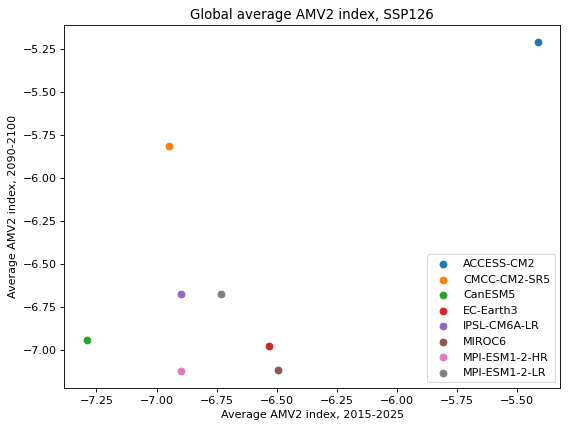

In [34]:
plt.figure(figsize=(8, 6), dpi=80)
for i in np.arange(np.shape(model_list)[0]):
    plt.scatter(np.nanmean(dset_amv2[model_list[i]][:10] - dset_globavg[model_list[i]][:10]), 
               np.nanmean(dset_amv2[model_list[i]][-10:] - dset_globavg[model_list[i]][-10:]),
               label=model_list[i][:-9])
plt.legend()
plt.title('Global average AMV2 index, SSP' + ssp)
plt.xlabel('Average AMV2 index, 2015-2025')
plt.ylabel('Average AMV2 index, 2090-2100')

Text(0, 0.5, 'Average SST dipole index, 2090-2100')

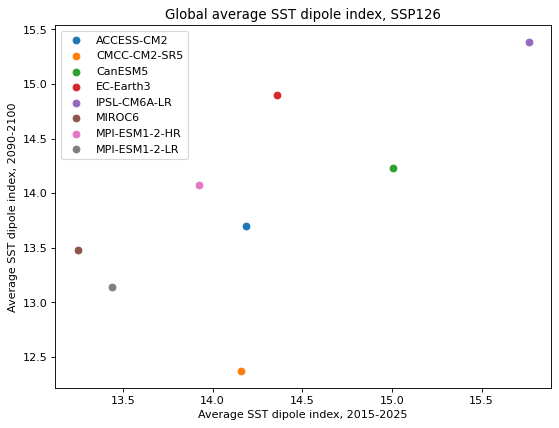

In [36]:
plt.figure(figsize=(8, 6), dpi=80)
for i in np.arange(np.shape(model_list)[0]):
    plt.scatter(np.nanmean(dset_sd2[model_list[i]][:10] - dset_sd1[model_list[i]][:10]), 
               np.nanmean(dset_sd2[model_list[i]][-10:] - dset_sd1[model_list[i]][-10:]),
               label=model_list[i][:-9])
plt.legend()
plt.title('Global average SST dipole index, SSP' + ssp)
plt.xlabel('Average SST dipole index, 2015-2025')
plt.ylabel('Average SST dipole index, 2090-2100')

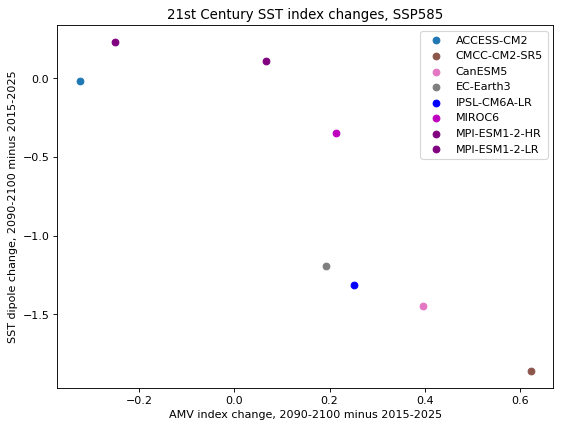

In [16]:
# here we can compare the AMV1 index with the SST dipole index 
plt.figure(figsize=(8, 6), dpi=80)
for i in np.arange(np.shape(model_list)[0]):
    plt.scatter((np.nanmean(dset_amv1[model_list[i]][-10:] - dset_globavg[model_list[i]][-10:])) - 
                (np.nanmean(dset_amv1[model_list[i]][:10] - dset_globavg[model_list[i]][:10])), 
               (np.nanmean(dset_sd2[model_list[i]][-10:] - dset_sd1[model_list[i]][-10:])) - 
                 (np.nanmean(dset_sd2[model_list[i]][:10] - dset_sd1[model_list[i]][:10])), 
                color=fs.colors[model_list2[i]], label=model_list[i][:-9])
plt.legend()
plt.title('21st Century SST index changes, SSP' + ssp)
plt.xlabel('AMV index change, 2090-2100 minus 2015-2025')
plt.ylabel('SST dipole change, 2090-2100 minus 2015-2025')
plt.savefig(figpath + 'amv_v_sstd_ssp'+ssp+'.png', dpi=100, bbox_inches='tight', pad_inches=0.1)

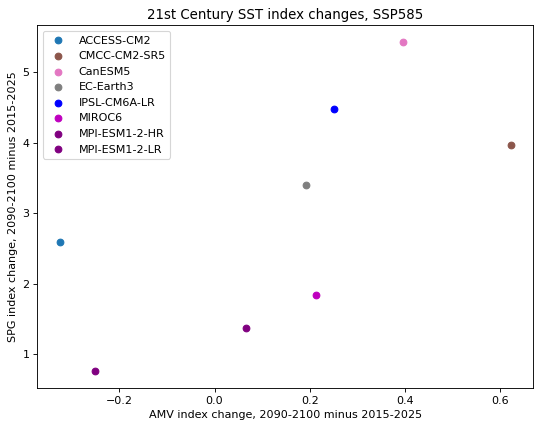

In [17]:
# here we can compare the AMV1 index with the SPG dipole index 
plt.figure(figsize=(8, 6), dpi=80)
for i in np.arange(np.shape(model_list)[0]):
    plt.scatter((np.nanmean(dset_amv1[model_list[i]][-10:] - dset_globavg[model_list[i]][-10:])) - 
                (np.nanmean(dset_amv1[model_list[i]][:10] - dset_globavg[model_list[i]][:10])), 
               np.nanmean(dset_spg[model_list[i]][-10:]) - np.nanmean(dset_spg[model_list[i]][:10]), 
                color=fs.colors[model_list2[i]], label=model_list[i][:-9])
plt.legend()
plt.title('21st Century SST index changes, SSP' + ssp)
plt.xlabel('AMV index change, 2090-2100 minus 2015-2025')
plt.ylabel('SPG index change, 2090-2100 minus 2015-2025')
plt.savefig(figpath + 'amv_v_spg_ssp'+ssp+'.png', dpi=100, bbox_inches='tight', pad_inches=0.1)

In [49]:
path_AMOC = '/gws/pw/j05/cop26_hackathons/bristol/project04/results/CMIP6/amoc/ScenarioMIP/ssp'+ssp+'/'
path_AMOC

'/gws/pw/j05/cop26_hackathons/bristol/project04/results/CMIP6/amoc/ScenarioMIP/ssp126/'

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


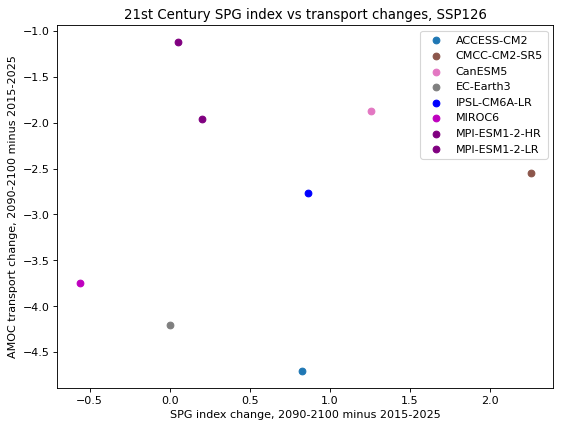

In [50]:
plt.figure(figsize=(8, 6), dpi=80)
for i in np.arange(np.shape(model_list)[0]):
    ds_amoc = xr.load_dataset(path_AMOC+model_list2[i]+'_ssp'+ssp+'_r1i1p1f1-1ym-amoc-index_26.5.nc')

    plt.scatter(np.nanmean(dset_spg[model_list[i]][-10:]) - np.nanmean(dset_spg[model_list[i]][:10]),
                np.nanmean(ds_amoc.transport[76:86]) - np.nanmean(ds_amoc.transport[:10]), 
                color=fs.colors[model_list2[i]], label=model_list[i][:-9])
plt.legend()
plt.title('21st Century SPG index vs transport changes, SSP' + ssp)
plt.xlabel('SPG index change, 2090-2100 minus 2015-2025')
plt.ylabel('AMOC transport change, 2090-2100 minus 2015-2025')
plt.savefig(figpath + 'spg_v_amoc_ssp'+ssp+'.png', dpi=100, bbox_inches='tight', pad_inches=0.1)

In [35]:
i=0

In [37]:
ds_amoc = xr.load_dataset(path_AMOC+model_list2[i]+'_ssp'+ssp+'_r1i1p1f1-1ym-amoc-index_26.5.nc')

In [38]:
ds_amoc

<xarray.Dataset>
Dimensions:    (datetime: 86)
Coordinates:
  * datetime   (datetime) datetime64[ns] 2015-12-31 2016-12-31 ... 2100-12-31
    latitude   float32 26.5
Data variables:
    transport  (datetime) float32 17.99 17.14 17.04 16.81 ... 8.362 8.951 8.053
Attributes:
    short_desc:    AMOC index (annual mean max streamfunction)
    latitude:      26.5
    model:         ACCESS-CM2
    scenario:      ssp585
    forcing:       r1i1p1f1
    date_created:  04 Jun 2021

In [39]:
model_list[i]

'ACCESS-CM2_r1i1p1f1'

In [40]:
np.nanmean(dset_spg[model_list[i]][-10:]) - np.nanmean(dset_spg[model_list[i]][:10])

2.588007

In [41]:
np.nanmean(ds_amoc.transport[90:100]) - np.nanmean(ds_amoc.transport[:10])

<ipython-input-41-c14624bd2b18>:1: RuntimeWarning: Mean of empty slice
  np.nanmean(ds_amoc.transport[90:100]) - np.nanmean(ds_amoc.transport[:10])


nan

In [42]:
ds_amoc.transport

<xarray.DataArray 'transport' (datetime: 86)>
array([17.990328 , 17.13938  , 17.041885 , 16.806675 , 16.477348 ,
       17.518913 , 17.021212 , 18.20838  , 15.928829 , 17.44822  ,
       15.168988 , 14.210916 , 13.728352 , 14.766621 , 14.453217 ,
       14.380635 , 13.691642 , 13.499448 , 13.32669  , 14.952454 ,
       15.996533 , 13.7628565, 13.515704 , 13.006947 , 13.58123  ,
       11.93143  , 12.765283 , 13.478894 , 11.548489 , 13.732392 ,
       12.877652 , 14.812882 , 13.677784 , 13.999997 , 13.599843 ,
       14.322129 , 12.975505 , 11.767583 , 11.49812  , 13.042892 ,
       14.407837 , 12.952891 , 13.068677 , 12.400101 , 13.508779 ,
       12.399902 , 12.664851 , 12.947791 , 12.287404 , 11.180436 ,
       12.343033 , 10.499381 , 11.863735 , 12.428772 , 11.867354 ,
       12.364667 , 10.851288 , 13.131714 , 13.045018 , 12.233447 ,
       11.862095 , 11.892903 , 10.453528 , 11.309449 , 12.416523 ,
       11.130372 , 10.596547 , 10.277986 , 10.596605 ,  9.612759 ,
       10.20382  , 10.236132 ,  9.141611 , 10.665494 , 10.00441  ,
        8.615928 ,  9.91368  ,  9.049493 ,  9.890093 ,  8.502628 ,
        8.879238 ,  9.247113 ,  8.270152 ,  8.361884 ,  8.95111  ,
        8.053309 ], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2015-12-31 2016-12-31 ... 2100-12-31
    latitude  float32 26.5